# Analysis of Un/Underserved locations

## Imports

In [40]:
import os, json, itables, requests, pygris, h3pandas
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## WSBO Data



In [2]:
unserved =  pd.read_csv(os.path.join('data','unserved.csv'))
underserved = pd.read_csv(os.path.join('data','underserved.csv'))

In [3]:
print(f'Unserved Locations: {unserved.shape[0]}')
print(f'Underserved Locatoins: {underserved.shape[0]}')

Unserved Locations: 236134
Underserved Locatoins: 85434


## FCC Data



In [4]:
s = requests.Session()
s.headers.update({'User-Agent': 'waInitialProposal/0.0.1'})

In [5]:
url = 'https://broadbandmap.fcc.gov/nbm/map/api/published/filing'
response = s.get(url, timeout=5)
response

<Response [200]>

In [6]:
parsed = json.loads(response.content)
uuid = parsed['data'][1]['process_uuid']

In [7]:
uuid

'a5a0b15b-25e0-4215-b193-56ed792aa142'

In [8]:
url = f"https://broadbandmap.fcc.gov/nbm/map/api/national_map_process/nbm_get_data_download/{uuid}/"
response = s.get(url, timeout=5)
parsed = json.loads(response.text)

In [9]:
filingData = pd.DataFrame(parsed['data'])

In [10]:
filingData

id data_category                            data_type  \
0     288925    Nationwide  Broadband Summary by Geography Type   
1     288927    Nationwide                      Fixed Broadband   
2     288928    Nationwide                      Fixed Broadband   
3     288929    Nationwide                      Fixed Broadband   
4     288930    Nationwide                      Fixed Broadband   
...      ...           ...                                  ...   
7988  296916      Provider                      Supporting Data   
7989  296917      Provider                      Supporting Data   
7990  296918      Provider                      Supporting Data   
7991  296919      Provider                      Supporting Data   
7992  296920      Provider                      Supporting Data   

     technology_code       technology_code_desc state_fips  state_name  \
0               None                       None       None        None   
1                  0                      Other         01     Alabama   
2                  0                      Other         04     Arizona   
3                  0                      Other         06  California   
4                  0                      Other         12     Florida   
...              ...                        ...        ...         ...   
7988              50      Fiber to the Premises       None        None   
7989              50      Fiber to the Premises       None        None   
7990              71    Licensed Fixed Wireless       None        None   
7991              50      Fiber to the Premises       None        None   
7992              70  Unlicensed Fixed Wireless       None        None   

     provider_id filing_id file_type modified_date  \
0           None      None       csv          None   
1           None      None       csv          None   
2           None      None       csv          None   
3           None      None       csv          None   
4           None      None       csv          None   
...          ...       ...       ...           ...   
7988      470127   2009560       csv          None   
7989      470128   2009788       csv          None   
7990      470129   2009292       csv          None   
7991      470132   2006608       csv          None   
7992      470133   2008580       csv          None   

                                              file_name download_available  
0          bdc_us_broadband_summary_by_geography_123122                Yes  
1                   bdc_01_Other_fixed_broadband_123122                Yes  
2                   bdc_04_Other_fixed_broadband_123122                Yes  
3                   bdc_06_Other_fixed_broadband_123122                Yes  
4                   bdc_12_Other_fixed_broadband_123122                Yes  
...                                                 ...                ...  
7988  bdc_us_470127_FibertothePremises_supporting_da...                Yes  
7989  bdc_us_470128_FibertothePremises_supporting_da...                Yes  
7990  bdc_us_470129_LicensedFixedWireless_supporting...                Yes  
7991  bdc_us_470132_FibertothePremises_supporting_da...                Yes  
7992  bdc_us_470133_UnlicensedFixedWireless_supporti...                Yes  

[7993 rows x 13 columns]

In [11]:
waFilingData = filingData[(filingData.state_fips == '53') & (filingData.file_type == 'csv')].reset_index(drop=True)

In [12]:
waFilingData

id data_category        data_type technology_code  \
0  288995    Nationwide  Fixed Broadband              10   
1  289049    Nationwide  Fixed Broadband              40   
2  289105    Nationwide  Fixed Broadband              50   
3  289160    Nationwide  Fixed Broadband              60   
4  289213    Nationwide  Fixed Broadband              61   
5  289264    Nationwide  Fixed Broadband              70   
6  289319    Nationwide  Fixed Broadband              71   
7  289364    Nationwide  Fixed Broadband              72   

        technology_code_desc state_fips  state_name provider_id filing_id  \
0                     Copper         53  Washington        None      None   
1                      Cable         53  Washington        None      None   
2      Fiber to the Premises         53  Washington        None      None   
3              GSO Satellite         53  Washington        None      None   
4             NGSO Satellite         53  Washington        None      None   
5  Unlicensed Fixed Wireless         53  Washington        None      None   
6    Licensed Fixed Wireless         53  Washington        None      None   
7         LBR Fixed Wireless         53  Washington        None      None   

  file_type modified_date                                          file_name  \
0       csv          None               bdc_53_Copper_fixed_broadband_123122   
1       csv          None                bdc_53_Cable_fixed_broadband_123122   
2       csv          None   bdc_53_FibertothePremises_fixed_broadband_123122   
3       csv          None         bdc_53_GSOSatellite_fixed_broadband_123122   
4       csv          None        bdc_53_NGSOSatellite_fixed_broadband_123122   
5       csv          None  bdc_53_UnlicensedFixedWireless_fixed_broadband...   
6       csv          None  bdc_53_LicensedFixedWireless_fixed_broadband_1...   
7       csv          None     bdc_53_LBRFixedWireless_fixed_broadband_123122   

  download_available  
0                Yes  
1                Yes  
2                Yes  
3                Yes  
4                Yes  
5                Yes  
6                Yes  
7                Yes

Implement download function here

### Pre-Cached Data

Retrieved 10-14-2023 based on data from 10-10-2023.

In [13]:
waFabricData = pd.DataFrame()

for file in os.listdir(os.path.join('data', 'csvs')):
    print(file)
    df = pd.read_csv(os.path.join('data', 'csvs', file))
    waFabricData = pd.concat([waFabricData, df], ignore_index=True)

bdc_53_Cable_fixed_broadband_123122.csv
bdc_53_Copper_fixed_broadband_123122.csv
bdc_53_FibertothePremises_fixed_broadband_123122.csv
bdc_53_GSOSatellite_fixed_broadband_123122.csv
bdc_53_LBRFixedWireless_fixed_broadband_123122.csv
bdc_53_LicensedFixedWireless_fixed_broadband_123122.csv
bdc_53_NGSOSatellite_fixed_broadband_123122.csv


In [14]:
waFabricData.to_parquet(os.path.join('data', 'waFabricData.parquet'))

In [15]:
waFabricData = pd.read_parquet(os.path.join('data', 'waFabricData.parquet'))

In [16]:
waFabricData

frn  provider_id brand_name  location_id  technology  \
0          3768165       130317    Xfinity   1015880838          40   
1          3768165       130317    Xfinity   1063122914          40   
2          3768165       130317    Xfinity   1063124469          40   
3          3768165       130317    Xfinity   1063130307          40   
4          3768165       130317    Xfinity   1063138082          40   
...            ...          ...        ...          ...         ...   
18045857  26043968       430076   Starlink   1410075068          61   
18045858  26043968       430076   Starlink   1367080933          61   
18045859  26043968       430076   Starlink   1410102057          61   
18045860  26043968       430076   Starlink   1367081504          61   
18045861  26043968       430076   Starlink   1367081907          61   

          max_advertised_download_speed  max_advertised_upload_speed  \
0                                  1200                           35   
1                                  1200                           35   
2                                  1200                           35   
3                                  1200                           35   
4                                  1200                           35   
...                                 ...                          ...   
18045857                             50                           10   
18045858                             50                           10   
18045859                             50                           10   
18045860                             50                           10   
18045861                             50                           10   

          low_latency business_residential_code state_usps      block_geoid  \
0                   1                         X         WA  530659514022053   
1                   1                         X         WA  530150020013011   
2                   1                         X         WA  530150020012011   
3                   1                         X         WA  530150016012074   
4                   1                         X         WA  530150017001001   
...               ...                       ...        ...              ...   
18045857            1                         R         WA  530019503021020   
18045858            1                         R         WA  530330233004008   
18045859            1                         R         WA  530250114032003   
18045860            1                         R         WA  530330302033005   
18045861            1                         R         WA  530330311021004   

               h3_res8_id  
0         8812db0811fffff  
1         8828f38e69fffff  
2         8828f38c4bfffff  
3         8828f3930dfffff  
4         8828f3818bfffff  
...                   ...  
18045857  8828895919fffff  
18045858  8828d558c9fffff  
18045859  88288919dbfffff  
18045860  8828d5c13dfffff  
18045861  8828d5d981fffff  

[18045862 rows x 12 columns]

In [17]:
columnsToDrop = [
    "frn",
    "provider_id",
    "brand_name",
    "technology",
    "max_advertised_download_speed",
    "max_advertised_upload_speed",
    "low_latency",
    "business_residential_code",
    "state_usps",
]
locationLookup = waFabricData.drop(columns=columnsToDrop)

In [18]:
locationLookup = locationLookup.drop_duplicates()

In [19]:
locationLookup

location_id      block_geoid       h3_res8_id
0          1015880838  530659514022053  8812db0811fffff
1          1063122914  530150020013011  8828f38e69fffff
2          1063124469  530150020012011  8828f38c4bfffff
3          1063130307  530150016012074  8828f3930dfffff
4          1063138082  530150017001001  8828f3818bfffff
...               ...              ...              ...
12535493   1342726865  530630102012023  8812db153dfffff
12535497   1342737225  530630103042005  8812db1147fffff
12535499   1342737372  530630104032044  8812db701dfffff
12535507   1342746597  530630112024002  8812db0cdbfffff
14570629   1349409498  530110405043001  8828f07365fffff

[2527898 rows x 3 columns]

In [20]:
locationLookup['hexBlock'] = locationLookup.h3_res8_id.astype('str') + '+' + locationLookup.block_geoid.astype('str')

In [21]:
itables.show(locationLookup)

## Unserved Analysis

In [22]:
unserved = unserved.merge(locationLookup, how='left', left_on='Unserved Location IDs', right_on='location_id')

In [23]:
unserved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236134 entries, 0 to 236133
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unserved Location IDs  236134 non-null  int64 
 1   location_id            236134 non-null  int64 
 2   block_geoid            236134 non-null  int64 
 3   h3_res8_id             236134 non-null  object
 4   hexBlock               236134 non-null  object
dtypes: int64(3), object(2)
memory usage: 9.0+ MB


In [24]:
unserved = unserved.drop(columns='Unserved Location IDs')

In [25]:
unserved

location_id      block_geoid       h3_res8_id  \
0        1410015656  530619400023079  8828d0a4adfffff   
1        1409662696  530519701003162  8812d8748bfffff   
2        1342736839  530630103053009  8812db0035fffff   
3        1342719613  530630133002010  8812db2851fffff   
4        1337285868  530610535112008  8828d0ac03fffff   
...             ...              ...              ...   
236129   1105695176  530419708001006  8828f305bdfffff   
236130   1049493621  530479709001119  8828d2ab6bfffff   
236131   1015918336  530659511002012  8812dbc237fffff   
236132   1056645894  530499502002095  8828c6c831fffff   
236133   1049465447  530479703031000  8812de75a7fffff   

                               hexBlock  
0       8828d0a4adfffff+530619400023079  
1       8812d8748bfffff+530519701003162  
2       8812db0035fffff+530630103053009  
3       8812db2851fffff+530630133002010  
4       8828d0ac03fffff+530610535112008  
...                                 ...  
236129  8828f305bdfffff+530419708001006  
236130  8828d2ab6bfffff+530479709001119  
236131  8812dbc237fffff+530659511002012  
236132  8828c6c831fffff+530499502002095  
236133  8812de75a7fffff+530479703031000  

[236134 rows x 4 columns]

In [26]:
columnsToDrop = [
    'location_id',
    'block_geoid',
    'hexBlock'
]
unserved = unserved.drop(columns=columnsToDrop)

In [27]:
type(unserved)

pandas.core.frame.DataFrame

In [28]:
unserved = unserved.groupby('h3_res8_id').size().reset_index().rename(columns={0: 'bsls'})

In [29]:
unserved

h3_res8_id  bsls
0      8812d80087fffff     1
1      8812d8008dfffff     1
2      8812d800a9fffff     2
3      8812d800b5fffff     1
4      8812d800bdfffff     3
...                ...   ...
47999  8828f66f3bfffff     2
48000  8828f66f43fffff     1
48001  8828f66f53fffff     1
48002  8828f66f55fffff     5
48003  8828f66f5dfffff     3

[48004 rows x 2 columns]

In [30]:
unserved = unserved.set_index('h3_res8_id')

In [31]:
itables.show(unserved)

In [32]:
unserved = unserved.h3.h3_to_geo_boundary()

In [33]:
unserved = unserved.reset_index()

In [34]:
unserved = gpd.GeoDataFrame(unserved)

In [55]:
unserved = unserved.to_crs(epsg=3857)

In [35]:
# unserved.explore(column='bsls')

<Axes: >

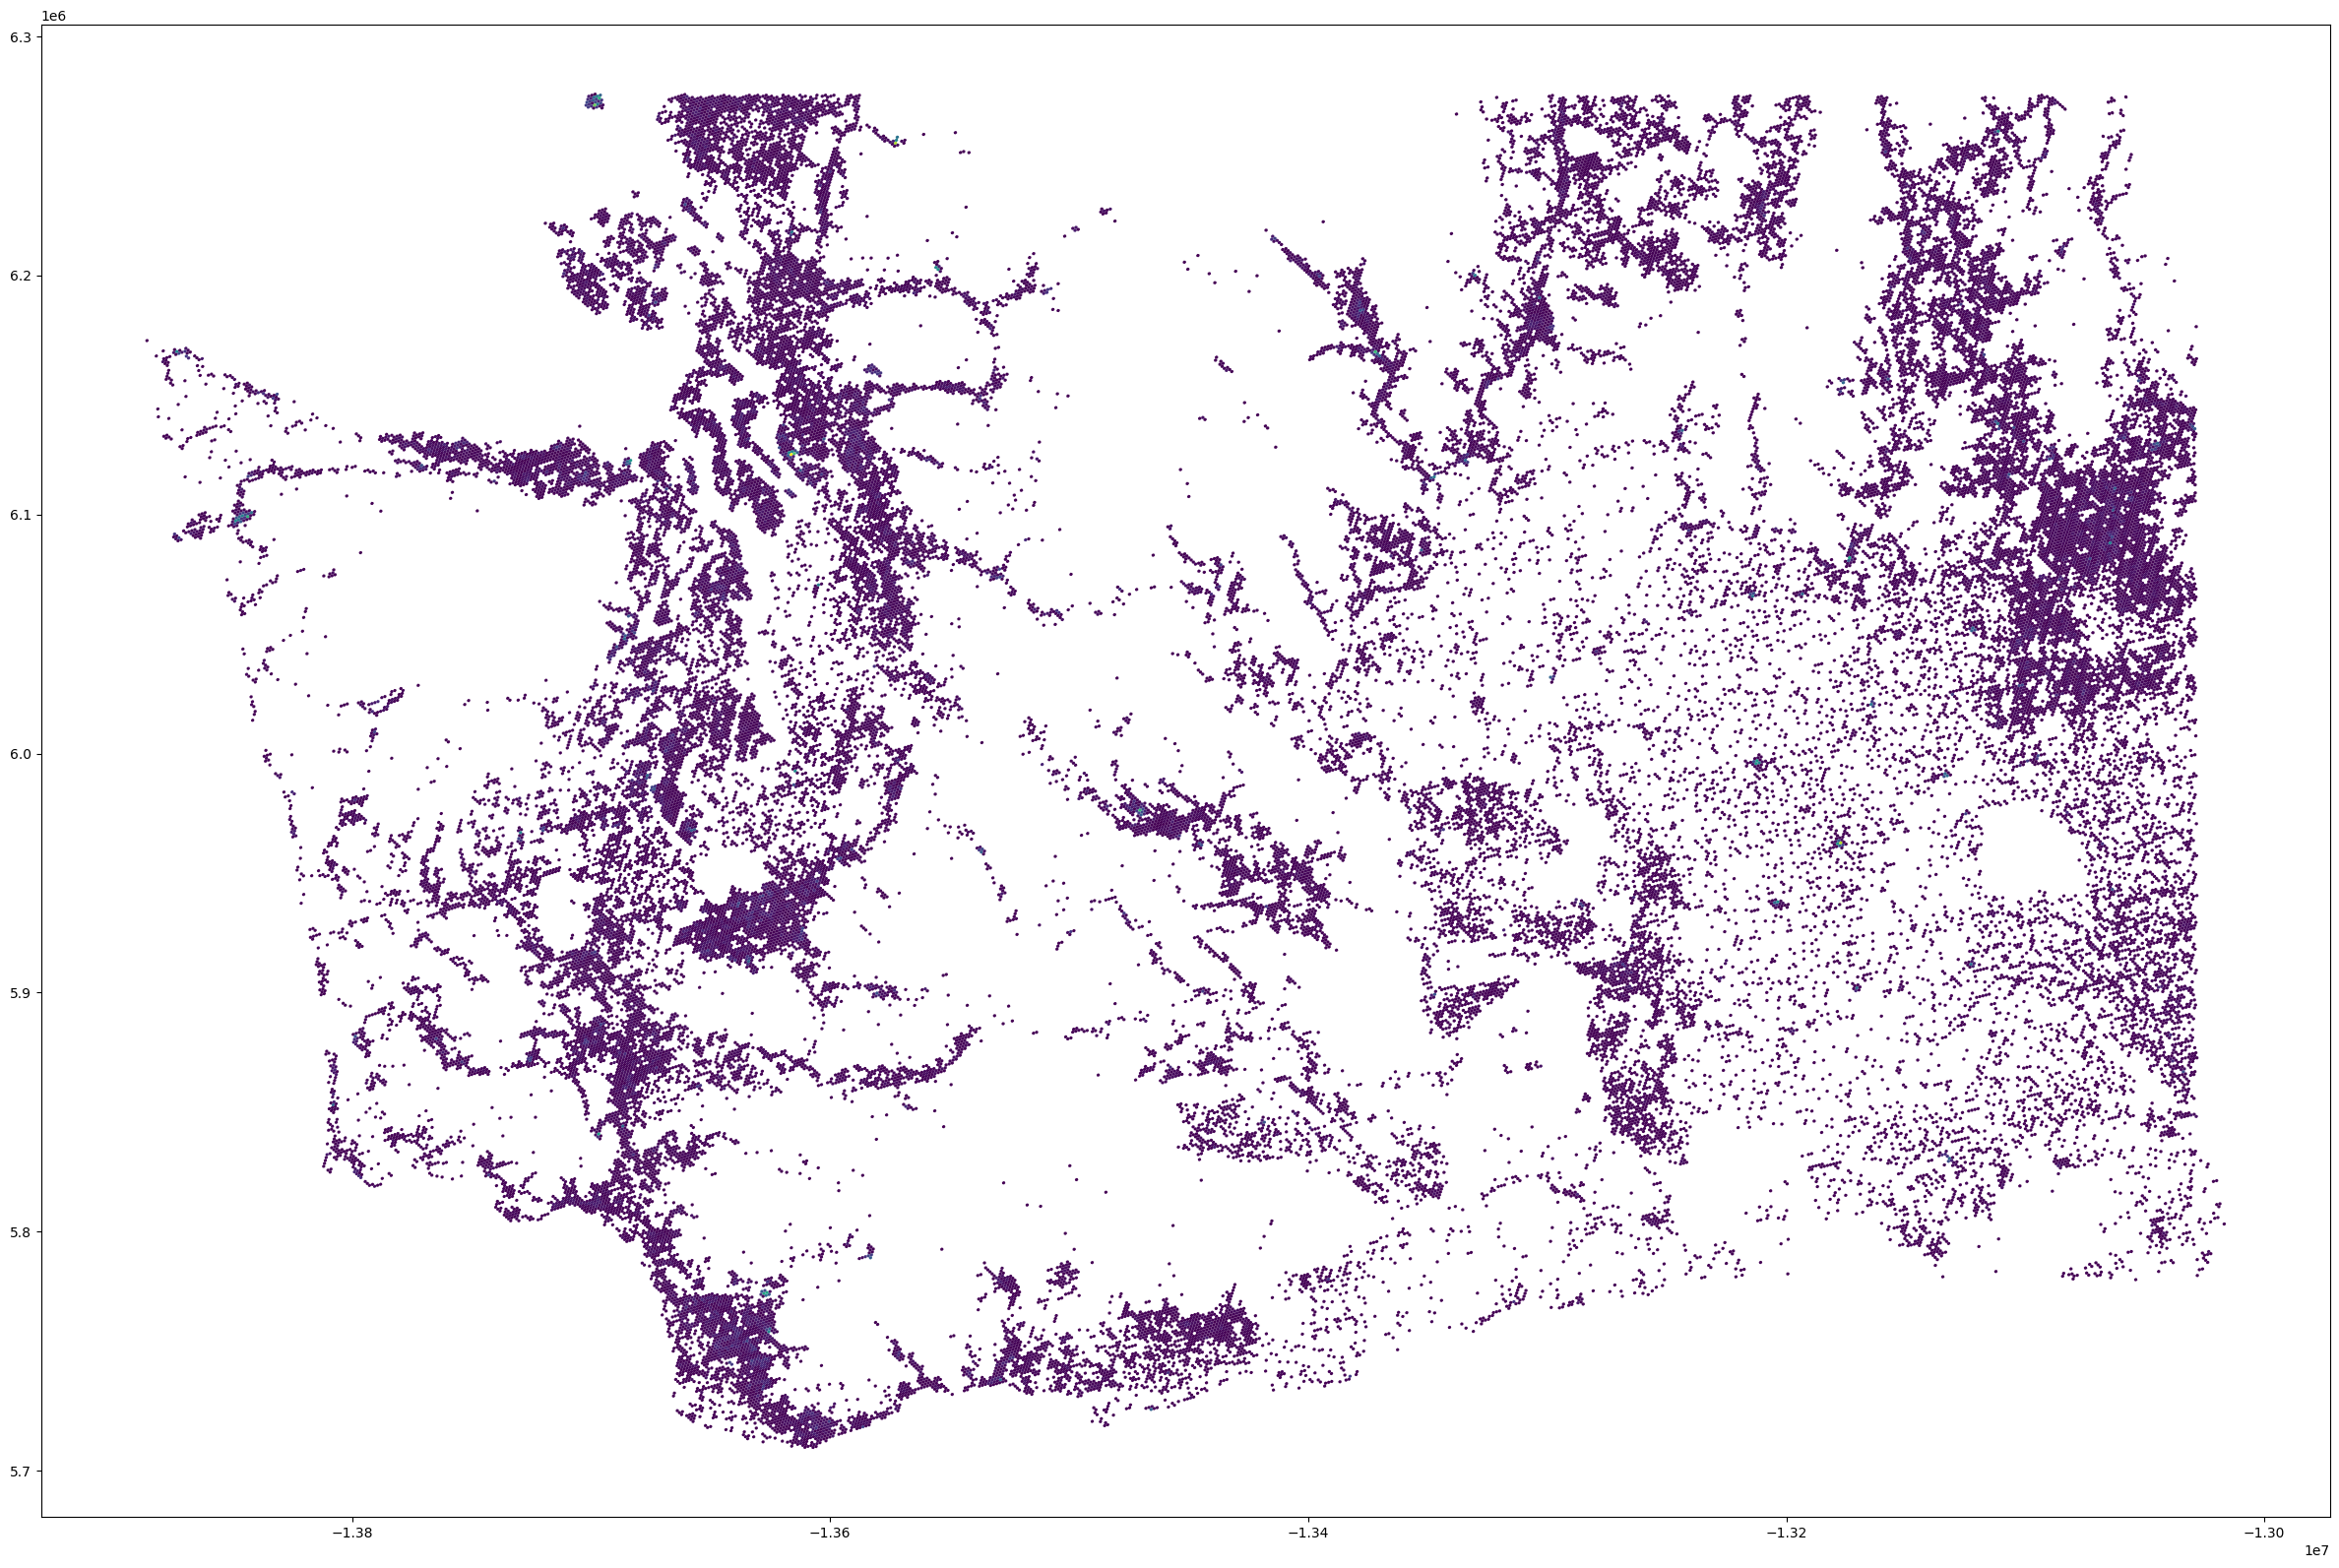

In [56]:
unserved.plot(figsize=(30,30), column='bsls')

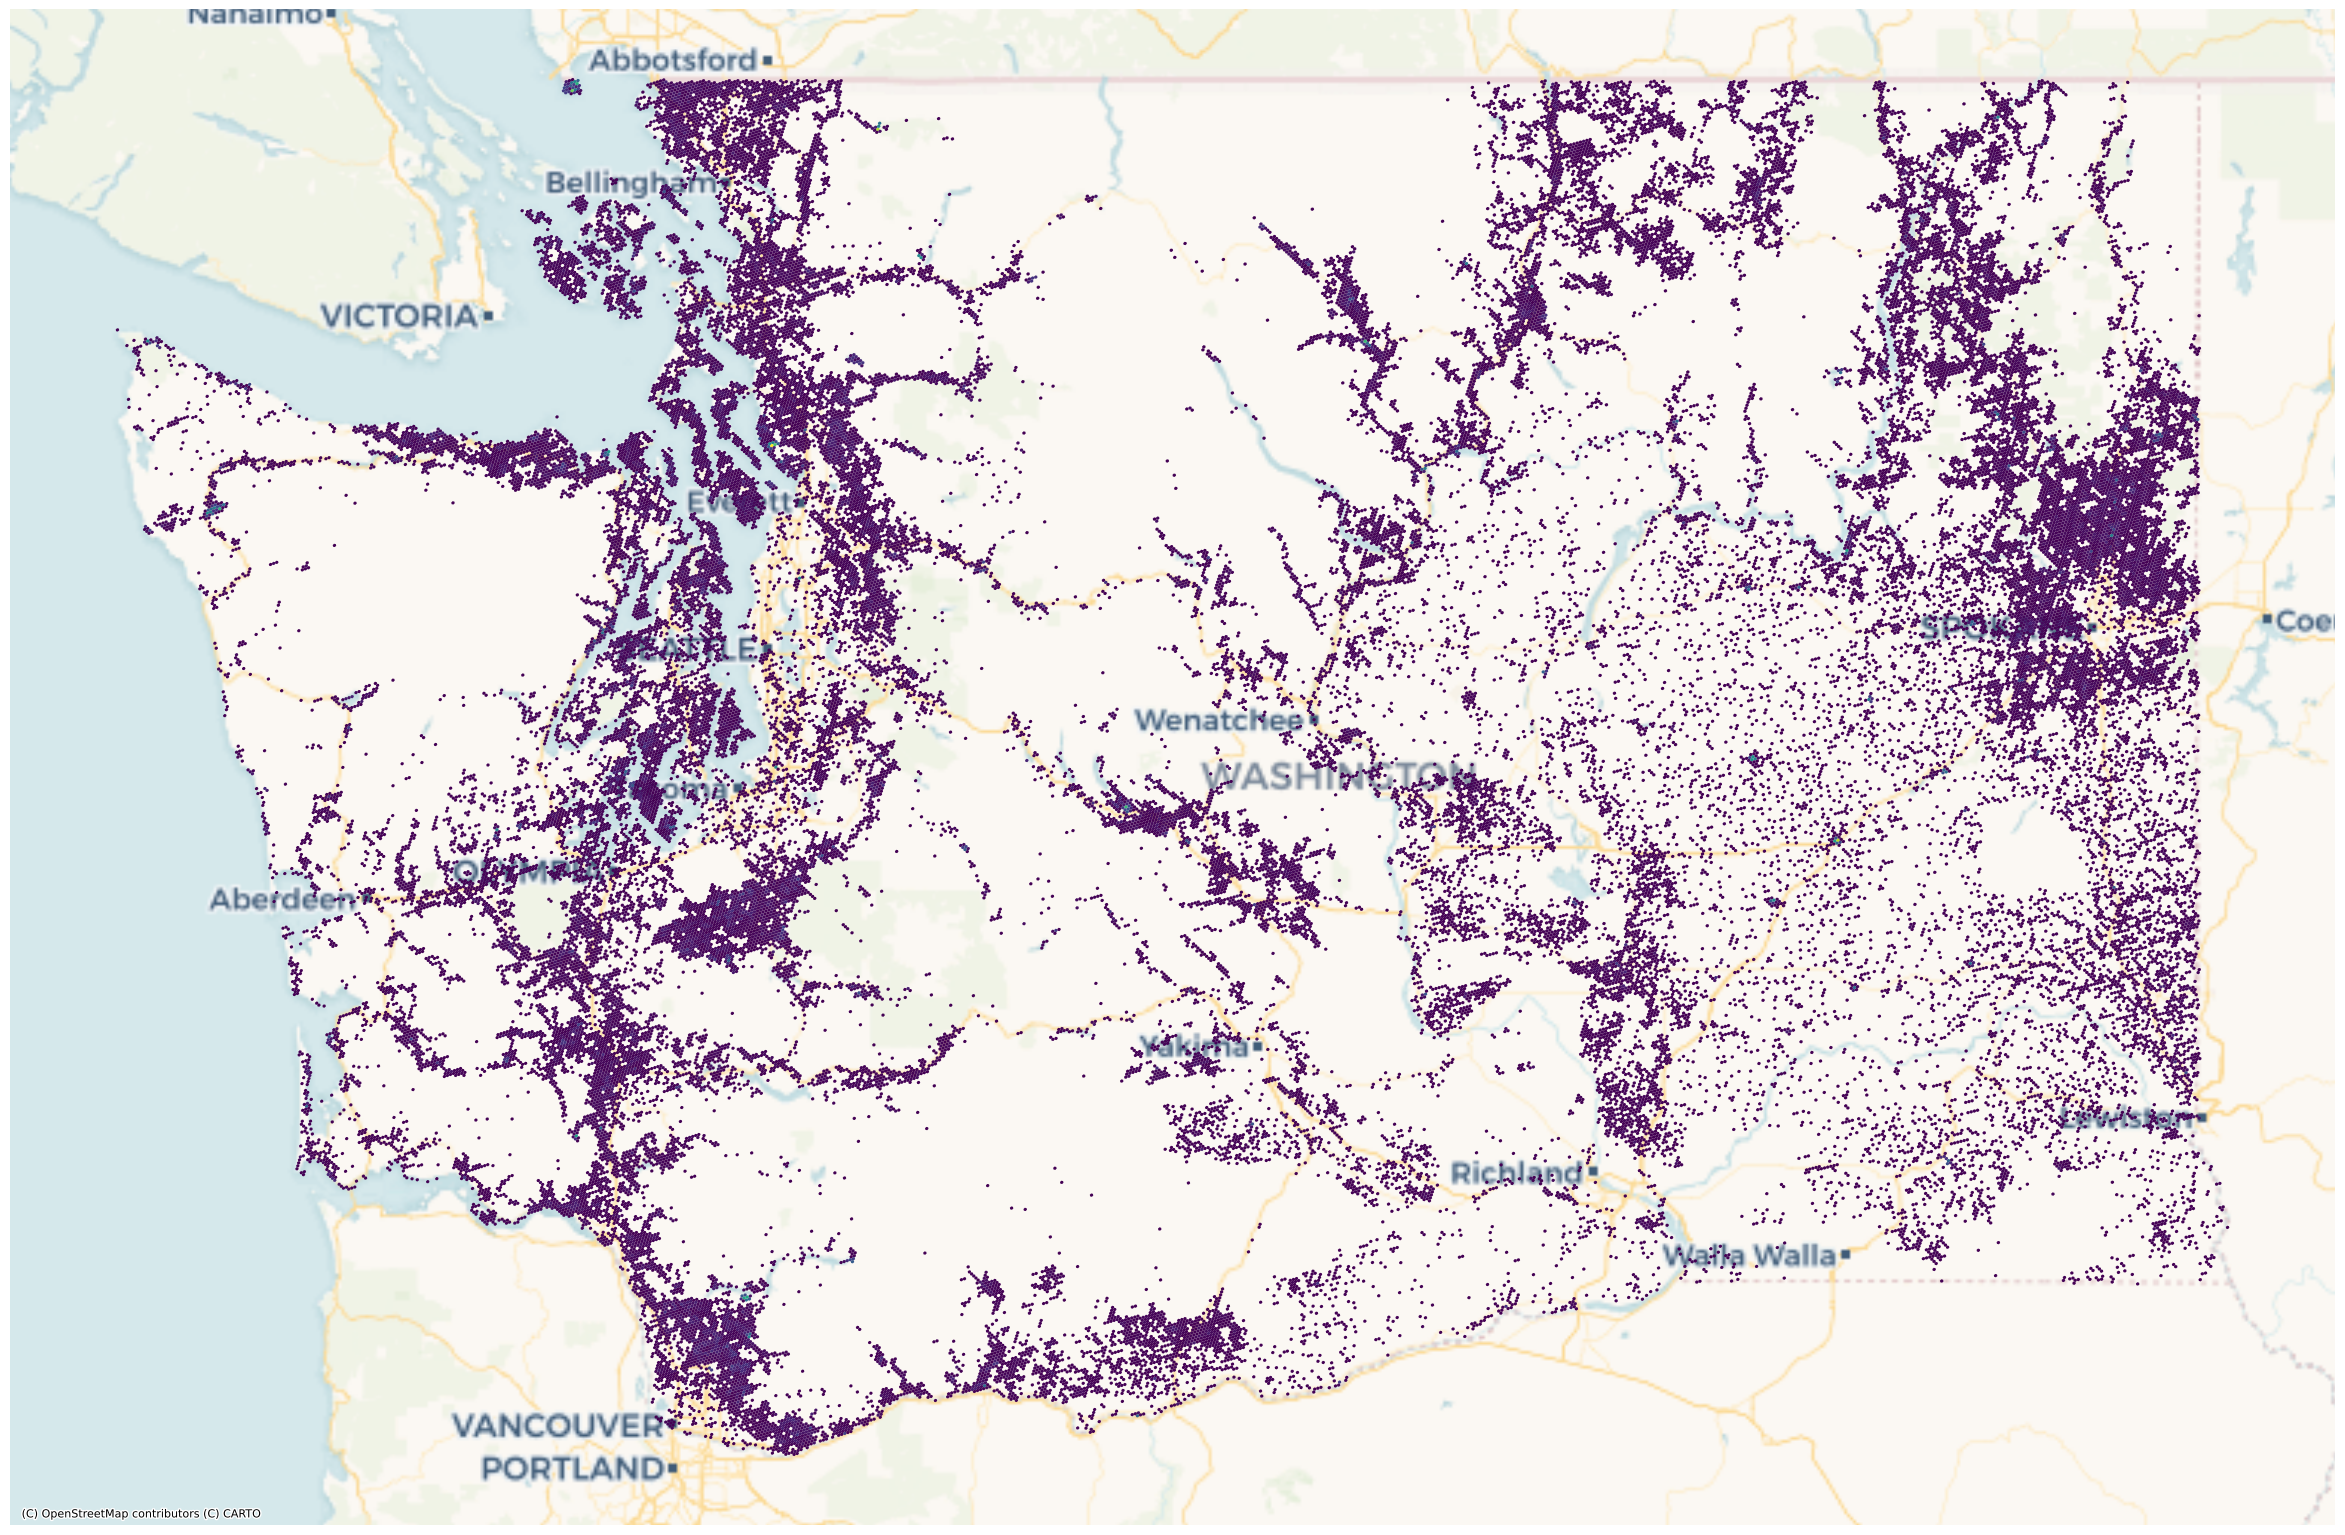

In [80]:
fig, ax2 = plt.subplots(figsize=(30, 25))
unserved.plot(ax=ax2, column='bsls')
ctx.add_basemap(ax=ax2, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager)
ax2.axis('off')
plt.savefig(os.path.join('export', 'unservedWashington.png'), format='png', bbox_inches='tight', pad_inches=0)

In [36]:
waCounties = pygris.counties(state='WA', cache=True)

Using the default year of 2021
Using FIPS code '53' for input 'WA'


In [63]:
waCounties = waCounties.to_crs(epsg=3857)

In [64]:
county = waCounties[waCounties.NAME == ]

<Axes: >

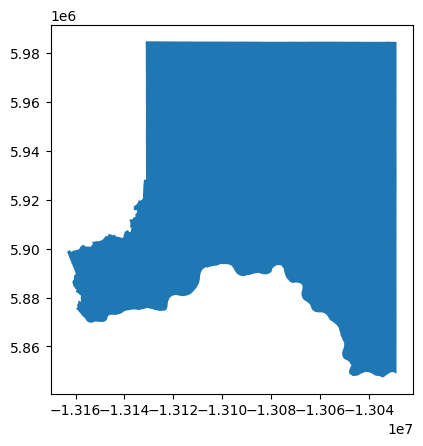

In [65]:
county.plot()

<Axes: >

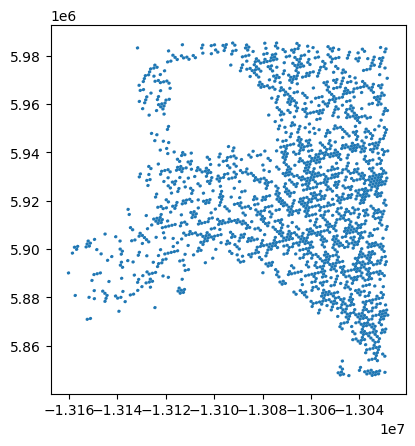

In [71]:
gpd.sjoin(unserved, county).plot()

(-13170260.548129193, -13020687.43139289, 5840050.135202477, 5992849.823387821)

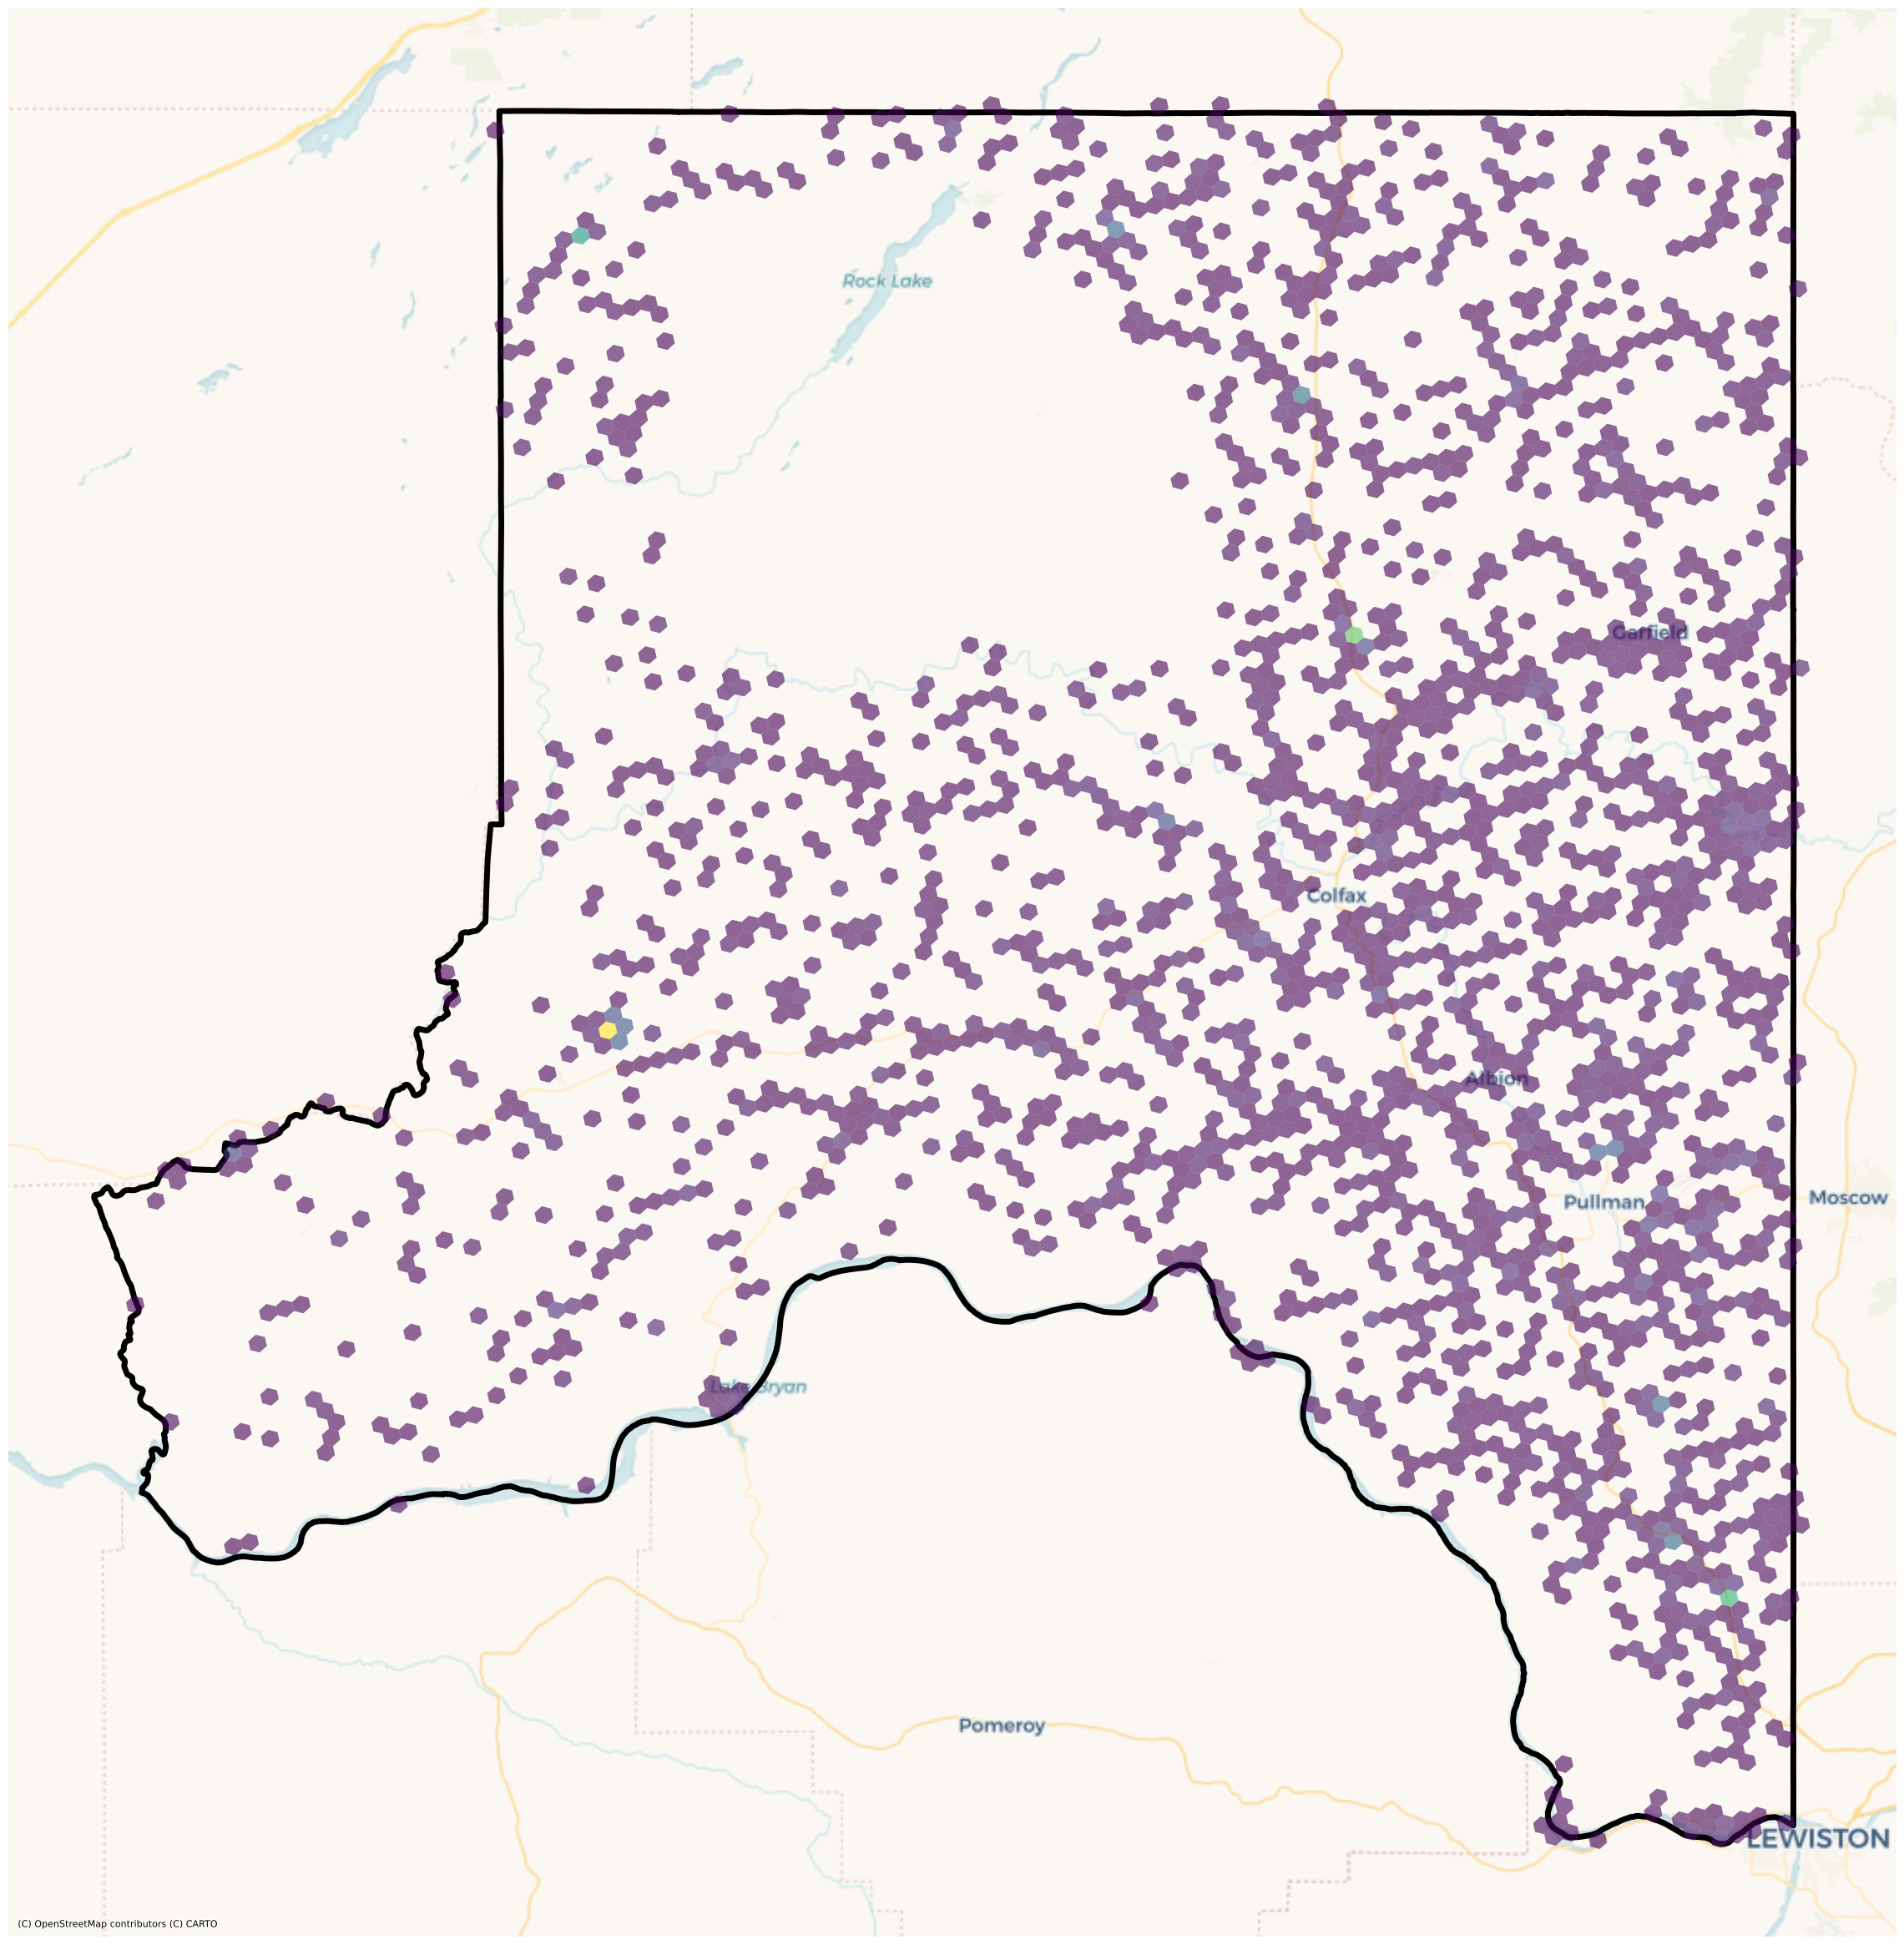

In [76]:
fig, ax2 = plt.subplots(figsize = (30,30))
waCounties[waCounties.NAME == 'Whitman'].to_crs(epsg=3857).plot(ax=ax2, facecolor='none', edgecolor='black', lw=5)
# cai.plot(ax=ax2)
intersectUnserved = gpd.sjoin(unserved, county)
intersectUnserved.plot(ax=ax2, column='bsls', alpha=.6)
ctx.add_basemap(ax=ax2, crs='EPSG:3857', source=ctx.providers.CartoDB.Voyager)
ax2.axis('off')

In [79]:
for county in waCounties.NAME:
    print(county)
    fig, ax2 = plt.subplots(figsize=(30, 30))
    waCounties[waCounties.NAME == county].to_crs('EPSG:3857').plot(ax=ax2, facecolor='none', edgecolor='black', lw=5)
    intersectUnserved = gpd.sjoin(unserved, waCounties[waCounties.NAME == county])
    intersectUnserved.plot(ax=ax2, column='bsls', alpha=.6)
    ctx.add_basemap(ax=ax2, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager)
    ax2.axis('off')
    plt.savefig(os.path.join('export', 'unserved', f'{county}.png'), format='png', bbox_inches='tight', pad_inches=0)
    plt.close()

Wahkiakum
Lewis
Jefferson
Columbia
Kittitas
Snohomish
Yakima
Okanogan
Spokane
Island
Clallam
Stevens
Pend Oreille
Whatcom
Chelan
Asotin
Ferry
Douglas
Benton
Garfield
King
Pacific
Klickitat
San Juan
Grays Harbor
Cowlitz
Walla Walla
Grant
Adams
Clark
Lincoln
Kitsap
Whitman
Mason
Skagit
Pierce
Thurston
Franklin
Skamania


## Underserved